# Kütüphanelerin İçeri Aktarılması

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml #datasetin bulunduğu 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Veri Setinin İçeri Aktarılması

In [7]:
mnist = fetch_openml("mnist_784")

# Veri Setinin İncelenmesi

In [9]:
mnist.data.shape

(70000, 784)

In [13]:
def showImage(dframe,index):
    some_digit = dframe.to_numpy()[index]
    some_digit_image = some_digit.reshape(28,28)
    
    plt.imshow(some_digit_image,cmap = "binary")
    plt.axis("off")
    plt.show

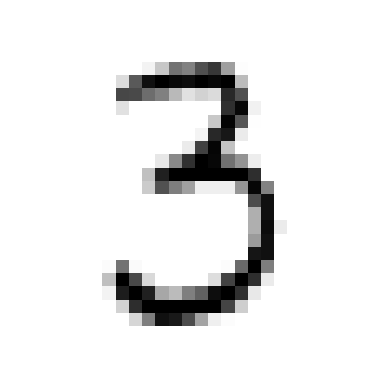

In [32]:
showImage(mnist.data, 50)

# Train - Test Verisinin Ayrılması

In [25]:
train_img, test_img, train_lbl, test_lbl = train_test_split(mnist.data, mnist.target, test_size = 1/7.0, random_state=0)

In [26]:
type(train_img)

pandas.core.frame.DataFrame

In [27]:
test_img_copy = test_img.copy()

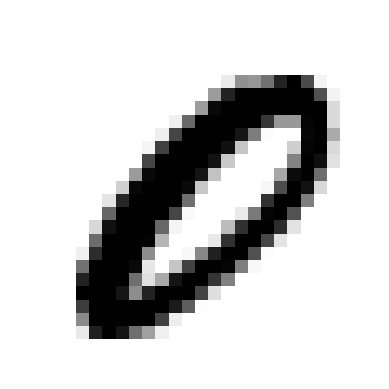

In [31]:
showImage(test_img_copy, 50)

# Veri Scaling İşlemi

In [33]:
scaler = StandardScaler()

scaler.fit(train_img)

train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

# Temel Bileşenler Analizi

In [34]:
pca = PCA(.95)

In [35]:
pca.fit(train_img)

PCA(n_components=0.95)

In [36]:
print(pca.n_components_)

327


In [37]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

# Veri Setine Logistic Regression Uygulanması

In [38]:
logisticRegr = LogisticRegression(solver = "lbfgs", max_iter = 10000)

In [39]:
logisticRegr.fit(train_img, train_lbl)

LogisticRegression(max_iter=10000)

# Sonuçların Gözlemlenmesi

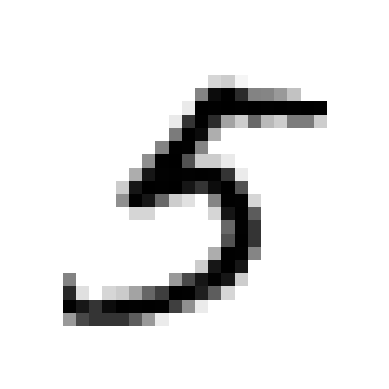

In [55]:
#tahmin edilen resim
showImage(test_img_copy, 22)

In [56]:
#tahmin sonucu
logisticRegr.predict(test_img[22].reshape(1,-1))

array(['5'], dtype=object)

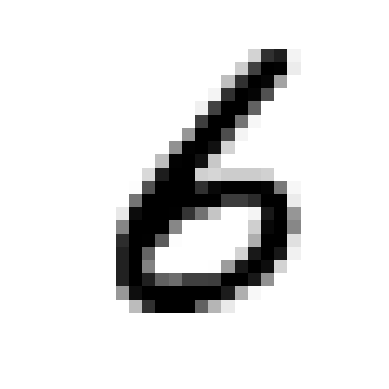

In [59]:
#tahmin edilen resim
showImage(test_img_copy,465)

In [57]:
#tahmin sonucu
logisticRegr.predict(test_img[465].reshape(1,-1))

array(['6'], dtype=object)

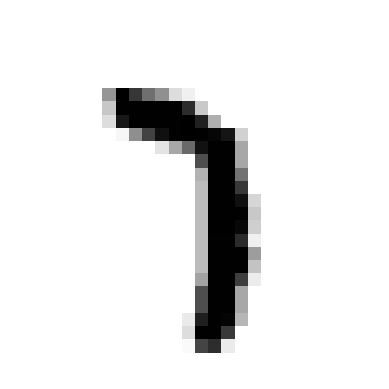

In [60]:
#tahmin edilen resim
showImage(test_img_copy,650)

In [58]:
#tahmin sonucu
logisticRegr.predict(test_img[650].reshape(1,-1))

array(['7'], dtype=object)

# Accuracy (Doğruluk) Ölçümü

In [54]:
logisticRegr.score(test_img, test_lbl)

0.9183